In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from module import *
from config import *

%matplotlib inline

In [2]:
test_batch_size = 1000
testset = torchvision.datasets.MNIST(root="./",train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=test_batch_size)

In [3]:
model = ArcFace()
model = model.eval().to(device)
model.load_state_dict(torch.load("./arcface.pth"))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

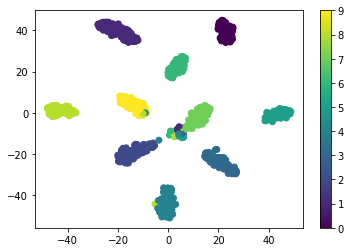

In [4]:
#visualize
(data,target) = next(iter(testloader))

gap = nn.AdaptiveAvgPool2d(1)
with torch.no_grad():
    y = model.features(data)
    y = gap(y)
    y = y.view(y.size(0),-1)
y = y.to("cpu").numpy()

Y = TSNE(n_components=2, random_state=0).fit_transform(y)

plt.scatter(Y[:, 0], Y[:, 1], c=target)
plt.colorbar()
plt.show()